<a href="https://colab.research.google.com/github/nashriatTamim/MyProject/blob/main/text_classification_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification (fundamentals)

In [ ]:
__author__ = "Pranava Madhyastha"
__version__ = "INM434/IN3045 City, University of London, Spring 2023"

## Contents


1. [Rule based classifier](#rulebased)
2. [Simple logistic regression based classifier](#logreg)

  


## Rule based classifier

Let us begin with rule based classifier. In order to build the classifier, we have to first perform some basic tokenisation. We will assume that most of the rules in this toy classifier are based on word based information. To make our task easy, let us only consider a small set of words that relate to the sentiments.

In our classifier, we will first define a set of potential cases, there are two cases here: positive words (for detecting positive sentiment) and negative words (for detecting negative sentiment).

We will then write a very simple function that just *checks* if a certain word from one of these bags are present, then predicts the potential sentiment of the sentence.  

In [1]:
positive_words = ['good', 'great', 'love', 'excellent', 'fantastic', 'amazing']
negative_words = ['bad', 'terrible', 'hate', 'awful', 'disappointing']

def classify_sentiment(sentence):
  sentiment = 'neutral'
  words = sentence.lower().split()
  for word in words:
    if word in positive_words:
      sentiment = 'positive'
      break
    elif word in negative_words:
      sentiment = 'negative'
      break
  return sentiment

sentences = ['I love this movie', 'This is a terrible film', 'The acting was fantastic', 'The movie was not disappointing']
for sentence in sentences:
  print(f'{sentence}: {classify_sentiment(sentence)}')


I love this movie: positive
This is a terrible film: negative
The acting was fantastic: positive
The movie was not disappointing: negative


### TODO: Identify the potential problems with this approach.

### TODO: What happened with last example? Why is this happening?

### TODO: Can you fix this?

## Text classification using a logistic regression.

Logistic Regression is a type of a linear model commonly used for binary classification problems. It is oftentimes used to model the probability of an event occurring, given a set of input *features*.

As a linear model, logistic regression finds a linear boundary that separates the data into two *classes*.

Typically, in logistic regression, the dot product of weights and features produce a score for each sample. The score is then transformed using the logistic function (also called the sigmoid function) to produce a probability between 0 and 1. The probability obtained can be interpreted as the likelihood that a given input belongs to the positive class.



In the code below, we begin with the main function that extracts features.

### TODO: What types of features are these?

After the extraction of the features, we have a few helper functions:



1. `sigmoid`: This maps a real-valued number to the range of 0 to 1.
2. `binary_cross_entropy`: This function calculates the binary cross-entropy loss between the true labels and the predicted probabilities.
3. `predict`: performs prediction
4. `evaluate`: This function takes a set of weights, a dataset, and a vocabulary and returns the accuracy of the model on the dataset.
5. `train`: This function trains the logistic regression model. It first extracts the features of the dataset using the extract_features function, then initializes the weights to be zero, and trains the model for a specified number of epochs by updating the weights using the gradient of the binary cross-entropy loss.



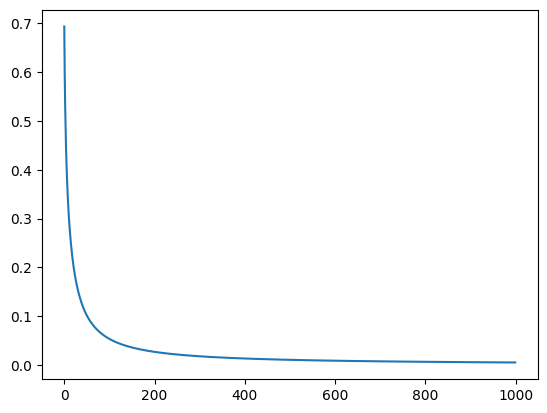

0.8333333333333334


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the toy dataset
data = [("I love this movie", 1),
        ("This is a great film", 1),
        ("I hated this movie", 0),
        ("This film was terrible", 0),
        ("I'm not a fan of this movie", 0),
        ("This movie is fantastic", 1),
        ("I love going to the movies", 1),
        ("This movie is a disaster", 0),
        ("I enjoyed watching this film", 1),
        ("This movie was a waste of time", 0)]

# Function to extract features from the text data
def extract_features(data, vocabulary):
    features = []
    for text, label in data:
        words = text.lower().split()
        feature = [0] * len(vocabulary)
        for word in words:
            if word in vocabulary:
                feature[vocabulary.index(word)] = 1
        features.append(feature)
    return np.array(features)

def predict(weights, features):
    z = np.dot(features, weights)
    return sigmoid(z)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(labels, predictions):
    return -np.mean(np.array(labels) * np.log(predictions) + (1 - np.array(labels)) * np.log(1 - predictions))

def evaluate(weights, data, vocabulary):
    features = extract_features(data, vocabulary)
    labels = [label for _, label in data]
    predictions = predict(weights, features)
    predictions = [1 if p >= 0.5 else 0 for p in predictions]
    accuracy = np.mean(np.array(predictions) == np.array(labels))
    return accuracy

def train(data, vocabulary, learning_rate=0.1, epochs=1000):
    features = extract_features(data, vocabulary)
    labels = [label for _, label in data]
    weights = np.zeros(len(vocabulary))
    loss_history = []
    accuracy_history = []
    for epoch in range(epochs):
        predictions = predict(weights, features)
        gradient = np.dot(features.T, predictions - labels)
        weights = weights - learning_rate * gradient
        loss = binary_cross_entropy(labels, predictions)
        loss_history.append(loss)
        accuracy = evaluate(weights, data, vocabulary)
        accuracy_history.append(accuracy)
    return weights, loss_history, accuracy_history

# Create the vocabulary
text = " ".join([text for text, label in data])
vocabulary = set(text.lower().split())
vocabulary = list(vocabulary)

# Train the classifier
weights, loss_history, accuracy_history = train(data, vocabulary)
plt.plot(loss_history, label='Loss')
plt.show()

test_data = [
    ("good one", 1),
    ("not good", 0),
    ("did not like", 0),
    ("horrible movie", 0),
    ("love it", 1),
     ("not a bad movie", 1),
]

# Evaluate the classifier
accuracy = evaluate(weights, test_data, vocabulary)
print(accuracy)



### TODO: Alter the weight initialisation to random. (use numpy's build in random function). What happens now to the training curve?

### TODO advanced: This is a binary classifier. How would you extend it to a multi-class classifier? Can you extend the code? What components would have to change?

## Using trusted libraries

Ideally, we would reuse trusted libraries to perform NLP. Some of the commonly recommended ones are: sklearn, nltk, spacy, torchtext, huggingface: transformers, datasets.

In code below, we will attempt to implement logistic regression using sklearn.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create the features and labels
texts = [text for text, label in data]
labels = [label for _, label in data]

# Extract the features using CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(texts)

# Train the classifier
model = LogisticRegression()
model.fit(features, labels)

# Evaluate the classifier on test data

test_texts = [text for text, label in test_data]
test_labels = [label for _, label in test_data]
test_features = vectorizer.transform(test_texts)
test_predictions = model.predict(test_features)
accuracy = accuracy_score(test_labels, test_predictions)
print(accuracy)

0.5


### TODO: What is the test-accuracy? What is happening? Compute the train accuracy.

### TODO: What is the vocabulary? Are the features different? Perform error analysis.
### TODO (extra): Match the outputs frm both the models.